In [1]:
import numpy as np  # linear algebra
import cv2

import pandas as pd

train_images = pd.read_pickle('data/train_images.pkl')
train_labels = pd.read_csv('data/train_labels.csv')

img_rows = train_images.shape[1]
img_cols = train_images.shape[2]


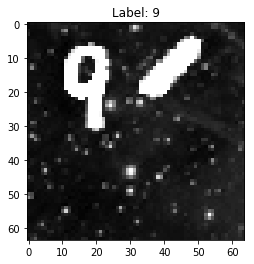

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
#Let's show image with id 16
img_idx = 3

plt.title('Label: {}'.format(train_labels.iloc[img_idx]['Category']))
plt.imshow(train_images[img_idx], cmap='gray')


In [43]:
class Preprocessor:
    
    @staticmethod
    def getBodyContours(bw_img):
        intImg = np.uint8(bw_img)
        contours = cv2.findContours(intImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
        contours = np.array(contours)
        boxes = []
        for cnt in contours:
            if cv2.contourArea(cnt) > 20:
                x, y, w, h = cv2.boundingRect(cnt)
                box = [x, y, x + w, y + h, w, h]
                box = np.int0(box)
                boxes.append(box)
        boxes = np.array(boxes)
        return boxes

    @staticmethod
    def cropROI(ROI, img):
        imgSet = img.copy()
        return imgSet[ROI[1]:ROI[3], ROI[0]:ROI[2]]
    
    @staticmethod
    def pad_and_center(img):
        width = max(img.shape[0],img.shape[1])
        margin = 8
        
        pad = np.zeros((width+margin, width+margin))
        x_offset = (width+margin - img.shape[0])//2
        y_offset = (width+margin - img.shape[1])//2
        pad[x_offset:img.shape[0]+x_offset,y_offset:img.shape[1]+y_offset]=img
        pad = cv2.resize(pad,(28,28))
        
        return pad
    
    @staticmethod
    def preprocess(img):
        img_bin = cv2.threshold(img, 200, 255, 0)[1]
        boxes = Preprocessor.getBodyContours(img_bin)
        biggestBox = sorted(boxes, key=lambda x: max(x[4], x[5]))[-1]
        bin_img_show = Preprocessor.cropROI(biggestBox, img_bin)
        final_img = Preprocessor.pad_and_center(bin_img_show)
        return final_img

In [38]:
img_idx = 4
img = train_images[img_idx].copy()
img_bin = cv2.threshold(img, 200, 255, 0)[1]
boxes = Preprocessor.getBodyContours(img_bin)
topbox = sorted(boxes, key=lambda x: max(x[4], x[5]))[-1]

x, y, x2, y2, w, h = map(int, topbox)
img_show = cv2.rectangle(img.copy(), (x, y), (x2, y2), (0, 255, 0), 1)
bin_img_show = Preprocessor.cropROI(topbox,img_bin)
final_img = Preprocessor.pad_and_center(bin_img_show)
print(final_img)

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0

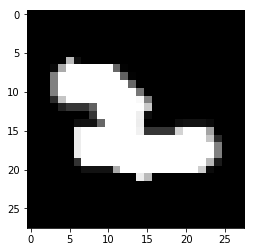

In [44]:
plt.imshow(final_img, cmap='gray')

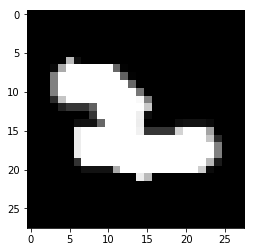

In [57]:
test_img = train_images[4].copy()
processed = Preprocessor.preprocess(test_img)
plt.imshow(processed, cmap='gray')